# Fitting an "artificial" spectral line

We want to fit an artificial absorption line. We construct a simple model composed of a line representing the continuum and a Gaussian dip representing the feature itself that (locally) fits the spectrum. Our model therefore has 5 parameters: slope ($m$), intercept ($b$), central wavelength ($\lambda_0$), width ($\sigma$), and strength ($C$).

This model is a *generative* model, which means it can (artifically) generate observations. We want to compare the model's spectrum with the observed spectrum. Our likelihood function then looks like this:

$$ P(\{x_i\}\ |\ m, b, \lambda_0, {\rm EW}) = m*\lambda + b - C * \exp\left[- \frac{(\lambda-\lambda_0)^2}{\sigma^2} \right] $$

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import stats
from scipy.optimize import minimize, brent
from decimal import Decimal
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

('Real parameters ', [-0.2, 2000.0, 6563.0, 1.5, 5.0])


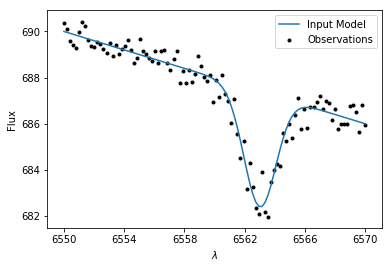

In [28]:
# CREATING THE ARTIFICIAL LINE
# Input model values
m = -0.2
b = 2000.0
lamb_0 = 6563.
sigma = 1.5
C = 5.0
param = [m,b,lamb_0,sigma,C]

# The "theoretical" spectrum
lamb = np.linspace(6550, 6570, 100)
flux = m*lamb + b - C*np.exp(-(lamb-lamb_0)**2 / sigma**2)
plt.plot(lamb,flux, label="Input Model")

# The "real" data with noise
x_i = flux + stats.norm.rvs(0.0, 0.5, len(flux))
plt.scatter(lamb, x_i, marker='.', color='k',label='Observations')

plt.axes().set_xticks(np.linspace(6550, 6570, 6))
plt.xlabel(r"$\lambda$")
plt.ylabel("Flux")
plt.legend()
plt.show()

Now the fitting process. We want to find the best fit model parameters for this spectrum. We provide the code for the model and the minimization routine.

In [35]:
# Instead of maximizing the likelihood (L) we minimize -L
def neg_likelihood(M, lamb, x_i):
    m, b, lamb_0, sigma, C = M
    x_model = m*lamb + b - C*np.exp(-(lamb-lamb_0)**2 / sigma**2)
    # Loss function
    likelihood = (x_model - x_i)**2   
    return np.sum(likelihood)

('Best model parameters =', array([ -1.99938673e-01,   1.99963003e+03,   6.56302073e+03,
         1.65977094e+00,   4.79921873e+00]))
('Real parameters =', [-0.2, 2000.0, 6563.0, 1.5, 5.0])


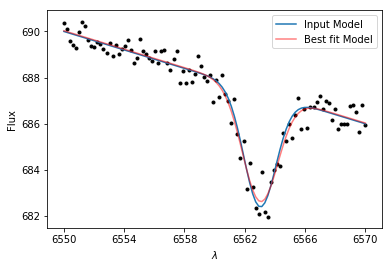

In [34]:
x0 = np.array([-0.05, 1000, 6563, 2.5, 10.0]) # some random parameters
res = minimize(neg_likelihood, x0, args=(lamb, x_i)) # it will find the solution of the above 
# function, given some initial guesses by minimizing
print('Best model parameters =',res.x) # these are the best model parameters
print('Real parameters =',param)

# Input model
plt.plot(lamb, flux, label="Input Model")

# Observations
plt.scatter(lamb, x_i, marker='.', color='k')

# Best-fit model
m, b, lamb_0, sigma, C = res.x
x_model = m*lamb + b - C*np.exp(-(lamb-lamb_0)**2 / sigma**2)
plt.plot(lamb, x_model, color='r', alpha=0.5, label="Best fit Model")

plt.legend()

plt.axes().set_xticks(np.linspace(6550, 6570, 6))
plt.xlabel(r"$\lambda$")
plt.ylabel("Flux")
plt.show()

We can see that the prediction of the model values works perfectly!